### Model: [Qwen/Qwen3-235B-A22B-Instruct-2507-FP8](https://huggingface.co/Qwen/Qwen3-235B-A22B-Instruct-2507-FP8)
### 2 vLLM versions were tested on the same MI325x8, each using 4 GPUs and executed sequentially
- vllm-0.11.1 - [docker.io/rocm/vllm:rocm7.0.0_vllm_0.11.1_20251103](https://hub.docker.com/layers/rocm/vllm/rocm7.0.0_vllm_0.11.1_20251103/images/sha256-8d60429043d4d00958da46039a1de0d9b82df814d45da482497eef26a6076506)
- vllm-0.15.1 - [docker.io/vllm/vllm-openai-rocm:v0.15.1](https://hub.docker.com/layers/vllm/vllm-openai-rocm/v0.15.1/images/sha256-4c7fbd92fe07e4dab956d283b5d61b971f6242516647df6af06fdcbc34fddc2c)

### Each vLLM version was tested with 40 samples, using num_prompts values from 1 to 40, and all runs completed successfully.
### Both input and output lengths are 1024 for all test cases.

In [1]:
import json
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy
%matplotlib inline  

In [4]:
df = pd.read_csv("./Qwen3-235B-A22B-Instruct-2507-FP8_vllm_20260217.csv")

In [6]:
df['base_url'].unique()

array(['http://mi325-vllm-0111.default.svc.cluster.local:80',
       'http://mi325-vllm-0151.default.svc.cluster.local:80'],
      dtype=object)

In [7]:
# All requests are successfully processed
df [ df['failed'] >0 ] 

,base_url,std_tpot_ms,model_id,p99_tpot_ms,num_prompts,date,max_concurrent_requests,total_input_tokens,mean_ttft_ms,median_tpot_ms,...,max_output_tokens_per_s,burstiness,task_id,max_concurrency,backend,total_token_throughput,median_itl_ms,request_goodput,timestamp,completed


In [9]:
df_0111 = df[ df["base_url"] == "http://mi325-vllm-0111.default.svc.cluster.local:80" ].copy()
df_0151 = df[ df["base_url"] == "http://mi325-vllm-0151.default.svc.cluster.local:80" ].copy()

df_0111 = df_0111.sort_values("num_prompts")
df_0151 =df_0151.sort_values("num_prompts")

print(df_0111.shape)
print(df_0151.shape)

(40, 37)
(40, 37)


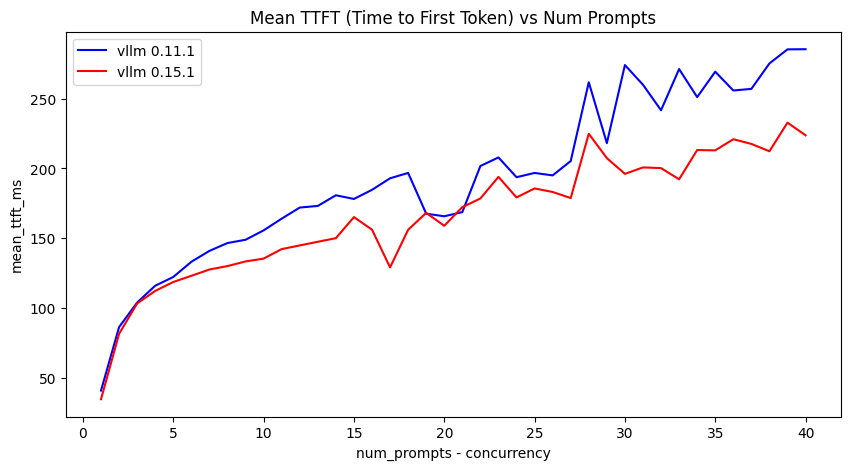

In [10]:
plt.figure(figsize=(10, 5)) 

plt.plot(
    df_0111["num_prompts"],
    df_0111["mean_ttft_ms"],
    color="blue",
    label="vllm 0.11.1"
)

plt.plot(
    df_0151["num_prompts"],
    df_0151["mean_ttft_ms"],
    color="red",
    label="vllm 0.15.1"
)

plt.xlabel("num_prompts - concurrency")
plt.ylabel("mean_ttft_ms")
plt.title("Mean TTFT (Time to First Token) vs Num Prompts")
plt.legend()

plt.show()

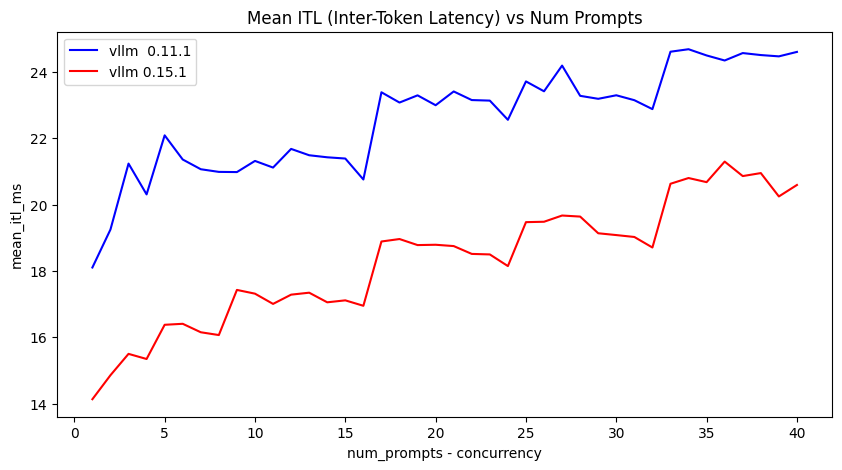

In [11]:
plt.figure(figsize=(10, 5)) 

plt.plot(
    df_0111["num_prompts"],
    df_0111["mean_itl_ms"],
    color="blue",
    label="vllm 0.11.1"
)

plt.plot(
    df_0151["num_prompts"],
    df_0151["mean_itl_ms"],
    color="red",
    label="vllm 0.15.1"
)

plt.xlabel("num_prompts - concurrency")
plt.ylabel("mean_itl_ms")
plt.title("Mean ITL (Inter-Token Latency) vs Num Prompts")
plt.legend()

plt.show()

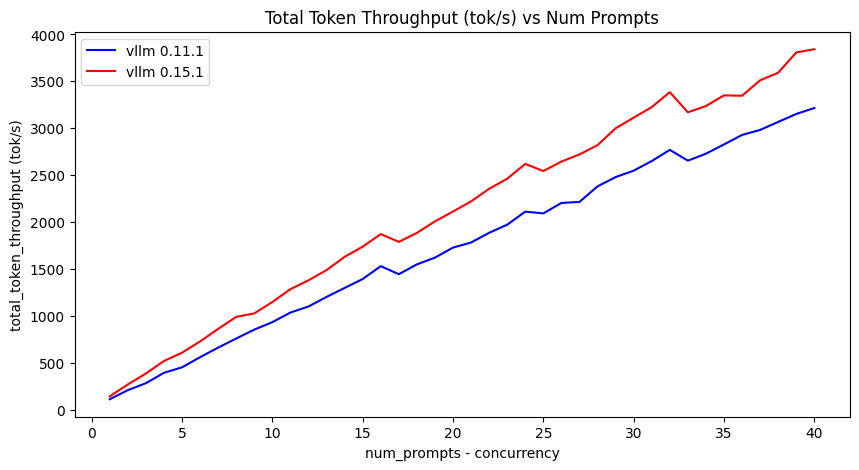

In [12]:
plt.figure(figsize=(10, 5)) 

plt.plot(
    df_0111["num_prompts"],
    df_0111["total_token_throughput"],
    color="blue",
    label="vllm 0.11.1"
)

plt.plot(
    df_0151["num_prompts"],
    df_0151["total_token_throughput"],
    color="red",
    label="vllm 0.15.1"
)

plt.xlabel("num_prompts - concurrency")
plt.ylabel("total_token_throughput (tok/s)")
plt.title("Total Token Throughput (tok/s) vs Num Prompts")
plt.legend()

plt.show()

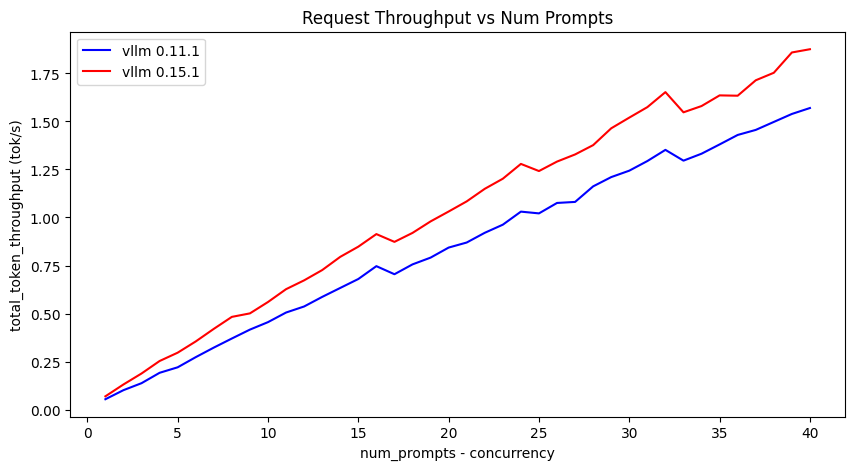

In [13]:
plt.figure(figsize=(10, 5)) 

plt.plot(
    df_0111["num_prompts"],
    df_0111["request_throughput"],
    color="blue",
    label="vllm 0.11.1"
)

plt.plot(
    df_0151["num_prompts"],
    df_0151["request_throughput"],
    color="red",
    label="vllm 0.15.1"
)

plt.xlabel("num_prompts - concurrency")
plt.ylabel("total_token_throughput (tok/s)")
plt.title("Request Throughput vs Num Prompts")
plt.legend()

plt.show()